In [8]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [66]:
def bsmCallDelta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    delta = np.exp(-div * tau) * norm.cdf(d1)
    
    return delta

def bsmPutDelta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    deltaput = np.exp(-div * tau) * norm.cdf(-d1)

    return deltaput


spot = 40.0
strike = 40.0
vol = 0.30
rate = 0.08
tau = 92/365
div = 0.0

callDelta = bsmCallDelta(spot, strike, vol, rate, tau, div)
print(f"The Call Delta is: {callDelta : 0.4f}")

putDelta = bsmPutDelta(spot, strike, vol, rate, tau, div)
print(f"The Put Delta is: {putDelta : 0.4f}")

The Call Delta is:  0.5828
The Put Delta is:  0.4172


In [104]:
def bsmCallGamma(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    Gamma = (np.exp(-div * tau) * norm.cdf(d1)) / (spot * vol * np.sqrt(tau))
    return Gamma

spot = 40.0
strike = 40.0
vol = 0.30
rate = 0.08
tau = 92/365
div = 0.0

callGamma = bsmCallGamma(spot, strike, vol, rate, tau, div)
print(f"The Call and Put Gamma is: {callGamma : 0.4f}")

The Call and Put Gamma is:  0.0967


In [19]:
def bsmCallTheta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    Theta = (div * spot * np.exp(-div * (tau)) * norm.cdf(d1)) - (rate * strike * np.exp(-rate * tau) * norm.cdf(d2)) - ((strike * np.exp(-rate * tau) * norm.cdf(d2) * vol) / (2 * np.sqrt(tau)))                                                                                                                         
    return Theta

spot = 40.0
strike = 40.0
vol = 0.30
rate = 0.08
tau = 92/365
div = 0.0

callTheta = bsmCallTheta(spot, strike, vol, rate, tau, div)
print(f"The Call Theta is: {callTheta : 0.4f}")
                                                   
    
def bsmPutTheta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    Theta = (div * spot * np.exp(-div * (tau)) * norm.cdf(d1)) - (rate * strike * np.exp(-rate * tau) * norm.cdf(d2)) - ((strike * np.exp(-rate * tau) * norm.cdf(d2) * vol) / (2 * np.sqrt(tau)))
    PutTheta1 = Theta + (rate * strike * np.exp(-rate * tau)) - div * spot * np.exp(-div * tau)                                                                                                                         
    return PutTheta1

spot = 40.0
strike = 40.0
vol = 0.30
rate = 0.08
tau = 92/365
div = 0.0

putTheta = bsmPutTheta(spot, strike, vol, rate, tau, div)
print(f"The Put Theta is: {putTheta : 0.4f}")

The Call Theta is: -7.7710
The Put Theta is: -4.6349


In [57]:
def bsmCallVega(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    Vega = spot * np.exp(-div * tau) * norm.cdf(d1) * tau                                                                                                                         
    return Vega

spot = 40.0
strike = 40.0
vol = 0.30
rate = 0.08
tau = 92/365
div = 0.0

callVega = bsmCallVega(spot, strike, vol, rate, tau, div)
print(f"The Call and Put Vega is: {callVega : 0.4f}")

The Call and Put Vega is:  5.8764


In [58]:
def bsmCallRho(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    Rho = tau * strike * np.exp(-rate * tau) * norm.cdf(d2)                                                                                                                         
    return Rho

def bsmPutRho(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    Rhoput = tau * strike * np.exp(-rate * tau) * norm.cdf(-d2)                                                                                                                         
    return Rhoput

spot = 40.0
strike = 40.0
vol = 0.30
rate = 0.08
tau = 92/365 
div = 0.0

callRho = bsmCallRho(spot, strike, vol, rate, tau, div)
print(f"The Call Rho is: {callRho : 0.4f}")

putRho = bsmPutRho(spot, strike, vol, rate, tau, div)
print(f"The Put Rho is: {putRho : 0.4f}")

The Call Rho is:  5.1712
The Put Rho is:  4.7097


In [78]:
## Call Payoff Function
def callPayoff(spot, strike):
    return np.maximum(spot - strike, 0.0)

## Put Payoff Function
def putPayoff(spot, strike):
    return np.maximum(strike - spot, 0.0)

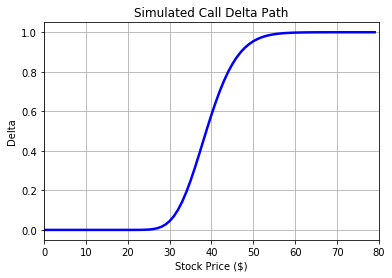

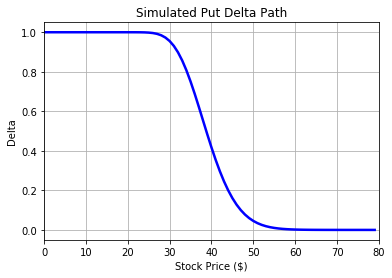

In [89]:
def plotPricePath(path):
    nsteps = path.shape[0]
    plt.plot(path, 'b', linewidth = 2.5)
    plt.title("Simulated Call Delta Path")
    plt.ylabel("Delta")
    plt.xlabel("Stock Price ($)")
    plt.xlim((0, nsteps))
    plt.grid(True)
    plt.show()

strike = 40.0
vol = 0.30
rate = 0.08
tau = 92/365 
div = 0.0
n=80

path = np.zeros(n)
path[0] = 0

for t in range(1, n):
    d1 = (np.log(t / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    path[t] = np.exp(-div * tau) * norm.cdf(d1)
    
plotPricePath(path)

def plotPricePath1(path):
    nsteps = path.shape[0]
    plt.plot(path, 'b', linewidth = 2.5)
    plt.title("Simulated Put Delta Path")
    plt.ylabel("Delta")
    plt.xlabel("Stock Price ($)")
    plt.xlim((0, nsteps))
    plt.grid(True)
    plt.show()
    
strike = 40.0
vol = 0.30
rate = 0.08
tau = 92/365 
div = 0.0
n=80

path = np.zeros(n)
path[0] = 1


for t in range(1, n):
    d1 = (np.log(t / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    path[t] = np.exp(-div * tau) * norm.cdf(-d1)
    
plotPricePath1(path)


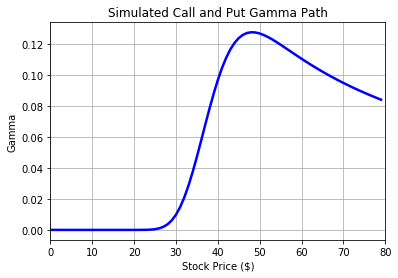

In [105]:
def plotPricePath(path):
    nsteps = path.shape[0]
    plt.plot(path, 'b', linewidth = 2.5)
    plt.title("Simulated Call and Put Gamma Path")
    plt.ylabel("Gamma")
    plt.xlabel("Stock Price ($)")
    plt.xlim((0, nsteps))
    plt.grid(True)
    plt.show()

strike = 40.0
vol = 0.30
rate = 0.08
tau = 92/365 
div = 0.0
n=80

path = np.zeros(n)
path[0] = 0

for t in range(1, n):
    d1 = (np.log(t / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    path[t] = (np.exp(-div * tau) * norm.cdf(d1)) / (t * vol * np.sqrt(tau))
    
plotPricePath(path)

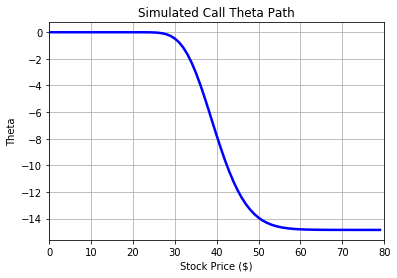

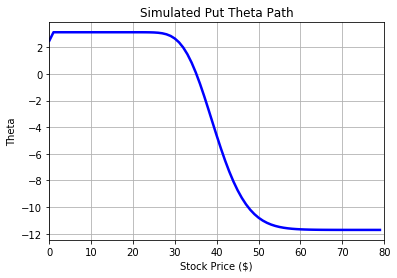

In [26]:
def plotPricePath(path):
    nsteps = path.shape[0]
    plt.plot(path, 'b', linewidth = 2.5)
    plt.title("Simulated Call Theta Path")
    plt.ylabel("Theta")
    plt.xlabel("Stock Price ($)")
    plt.xlim((0, nsteps))
    plt.grid(True)
    plt.show()
    
strike = 40.0
vol = 0.30
rate = 0.08
tau = 92/365 
div = 0.0
n=80

path = np.zeros(n)
path[0] = 0

for t in range(1, n):
    d1 = (np.log(t / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    path[t] = (div * t * np.exp(-div * (tau)) * norm.cdf(d1)) - (rate * strike * np.exp(-rate * tau) * norm.cdf(d2)) - ((strike * np.exp(-rate * tau) * norm.cdf(d2) * vol) / (2 * np.sqrt(tau)))
plotPricePath(path)    

def plotPricePath(path):
    nsteps = path.shape[0]
    plt.plot(path, 'b', linewidth = 2.5)
    plt.title("Simulated Put Theta Path")
    plt.ylabel("Theta")
    plt.xlabel("Stock Price ($)")
    plt.xlim((0, nsteps))
    plt.grid(True)
    plt.show()
    
strike = 40.0
vol = 0.30
rate = 0.08
tau = 92/365 
div = 0.0
n=80

path = np.zeros(n)
path[0] = 2.5

for t in range(1, n):
    d1 = (np.log(t / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    theta = (div * t * np.exp(-div * (tau)) * norm.cdf(d1)) - (rate * strike * np.exp(-rate * tau) * norm.cdf(d2)) - ((strike * np.exp(-rate * tau) * norm.cdf(d2) * vol) / (2 * np.sqrt(tau)))
    path[t] = theta + (rate * strike * np.exp(-rate * tau)) - div * t * np.exp(-div * tau) 
plotPricePath(path) 

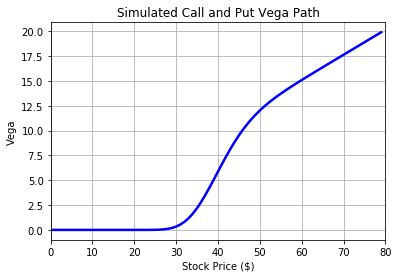

In [22]:
def plotPricePath(path):
    nsteps = path.shape[0]
    plt.plot(path, 'b', linewidth = 2.5)
    plt.title("Simulated Call and Put Vega Path")
    plt.ylabel("Vega")
    plt.xlabel("Stock Price ($)")
    plt.xlim((0, nsteps))
    plt.grid(True)
    plt.show()

strike = 40.0
vol = 0.30
rate = 0.08
tau = 92/365 
div = 0.0
n=80

path = np.zeros(n)
path[0] = 0

for t in range(1, n):
    d1 = (np.log(t / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    path[t] = t * np.exp(-div * tau) * norm.cdf(d1) * tau   
    
plotPricePath(path)

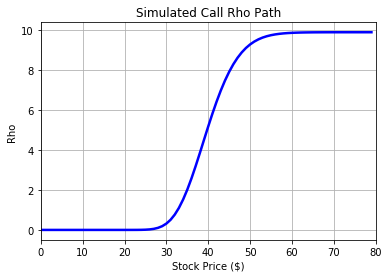

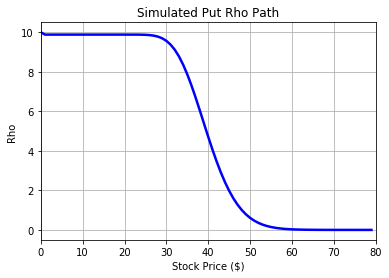

In [108]:
def plotPricePath(path):
    nsteps = path.shape[0]
    plt.plot(path, 'b', linewidth = 2.5)
    plt.title("Simulated Call Rho Path")
    plt.ylabel("Rho")
    plt.xlabel("Stock Price ($)")
    plt.xlim((0, nsteps))
    plt.grid(True)
    plt.show()

strike = 40.0
vol = 0.30
rate = 0.08
tau = 92/365 
div = 0.0
n=80

path = np.zeros(n)
path[0] = 0

for t in range(1, n):
    d1 = (np.log(t / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    path[t] = tau * strike * np.exp(-rate * tau) * norm.cdf(d2)  
    
plotPricePath(path)

def plotPricePath(path):
    nsteps = path.shape[0]
    plt.plot(path, 'b', linewidth = 2.5)
    plt.title("Simulated Put Rho Path")
    plt.ylabel("Rho")
    plt.xlabel("Stock Price ($)")
    plt.xlim((0, nsteps))
    plt.grid(True)
    plt.show()

strike = 40.0
vol = 0.30
rate = 0.08
tau = 92/365 
div = 0.0
n=80

path = np.zeros(n)
path[0] = 10

for t in range(1, n):
    d1 = (np.log(t / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    path[t] = tau * strike * np.exp(-rate * tau) * norm.cdf(-d2)  
    
plotPricePath(path)

In [3]:
def plotPricePath(path):
    nsteps = path.shape[0]
    plt.plot(path, 'b', linewidth = 2.5)
    plt.title("Simulated Call Rho Path")
    plt.ylabel("Rho")
    plt.xlabel("Stock Price ($)")
    plt.xlim((0, nsteps))
    plt.grid(True)
    plt.show()
   

    strike = 40.0
    sig = 0.30
    rate = 0.08
    tau = 92/365
    div = 0.0
    n = 5
    h = 1/252
    h[0] = 0
    z[1] = 0

spots = np.zeros(n)
spots[0] = 0
z = np.random.normal(size=n)

for t in range(1, n):
    d1 = (np.log(t / strike) + (rate - div + 0.5 * sig * sig) * tau) / (vol * np.sqrt(tau))
    delta = np.exp(-div * tau) * norm.cdf(d1)
    h[t] = 1 + h[t - 1]
    path[t] = t * np.exp((rate - delta - (1/2) * sig**2) * h[t] + sig * np.sqrt(h[t]*z[t])

plotPricePath(path)

SyntaxError: invalid syntax (<ipython-input-3-b3df16620e1e>, line 32)